# 畫時序圖、延遲k自相關圖、延遲k偏自相關圖

In [10]:
import statsmodels.tsa.api as smt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

 

In [11]:

 
dfname='附录1.2'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0]
y=y.values[:,0]

acf=np.ones(18)
g0=np.sum((y-y.mean())**2)

for i in range(1,18):
    y1 = y[:-i]
    y2 = y[i:]
#     print(y1)
#     print(y2)


for i in range(1,18):
    y1=y[:-i]
    #print(y1)
    y2=y[i:]
   # print(y2)
    gk=np.sum((y1-y.mean())*(y2-y.mean()))
    acf[i]=gk/g0


print(acf)

[ 1.          0.91392186  0.84342292  0.76719398  0.69544891  0.6087441
  0.54377943  0.47630634  0.39543399  0.32092332  0.24205714  0.14651776
  0.05781973 -0.03298495 -0.10840121 -0.16824648 -0.21503145 -0.25968956]


### 利用statsmodels

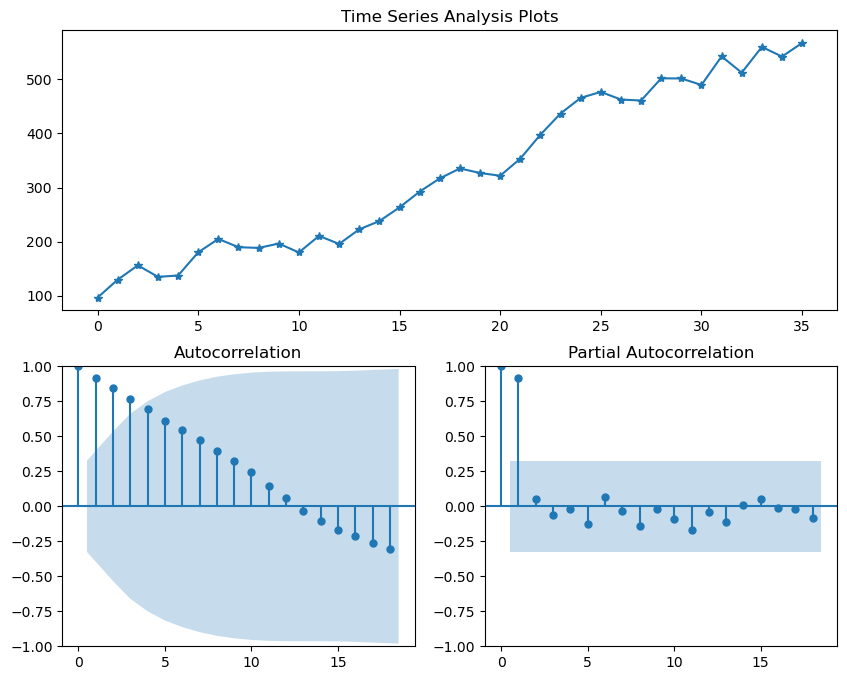

In [12]:
def drawts(y,pname):
    ##draw ax
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots')
    smt.graphics.plot_acf(y,lags=18,ax=acf_ax,alpha=0.05) ##2sigma
    smt.graphics.plot_pacf(y,lags=18,ax=pacf_ax,alpha=0.05)  ##2sigma
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()
drawts(y,dfname)

### 自定義

作業：
在
    ###YOUR CODE to calculate autocorrelation function
    ###YOUR CODE to calculate autocorrelation function
    ###YOUR CODE to calculate autocorrelation function
    ###YOUR CODE to calculate autocorrelation function
    ###YOUR CODE to calculate autocorrelation function
和
    ###YOUR CODE to calculate 2 sigma
    ###YOUR CODE to calculate 2 sigma
    ###YOUR CODE to calculate 2 sigma
    ###YOUR CODE to calculate 2 sigma
    ###YOUR CODE to calculate 2 sigma
填寫相應代碼來計算延遲k自相關系數和2倍標准差

並將myname='KONGHOIIO'修改為你的姓名

In [106]:
def mydrawts(y,pname):
    
    myname='zhangxuanke'
    ##draw ax  lags=19
    fig = plt.figure(figsize=(10,8))
    ts_ax=plt.subplot2grid((2,2),(0,0),colspan=2)
    acf_ax=plt.subplot2grid((2,2),(1,0))
    pacf_ax=plt.subplot2grid((2,2),(1,1))
    
    ##draw plot
    ts_ax.plot(y,'*-')
    ts_ax.set_title('Time Series Analysis Plots(custom %s)'%myname)
    
    
    
    #dataset   n=20  lags=19
    n=20
    lags=19
    callen=len(y)
    acf=np.ones(n)
    twosigma=np.ones((n))
    g0=np.sum((y-y.mean())**2)
    for i in range(1,n):
        y1=y[:-i]
        y2=y[i:]
        gk=np.sum((y1-y.mean())*(y2-y.mean()))
        acf[i]=gk/g0
    print(acf)   
    pacf_values = np.zeros(n)
    pacf_values[0] = 1
    for k in range(1, lags + 1):
        r = acf
        R = np.linalg.inv(np.array([[r[abs(i - j)] for i in range(k)] for j in range(k)]))
        pacf_values[k] = R[-1].dot(r[1:k + 1])
    
    conf_interval1= 1.96 / np.sqrt(np.arange(n, n-lags-1, -1))
    conf_interval = 1.96 / np.sqrt(callen)
    print(conf_interval)
    conf_intervals = np.array(
        [conf_interval * np.sqrt(1 + 2 * np.sum(acf[1:k] ** 2)) for k in range(0,lags+1 )])
    #print(conf_intervals.shape)
    #conf_intervals = np.insert(conf_intervals, 0, conf_interval)
    print(conf_intervals)
    
    ##calclate acf  
    acf_ax.stem(range(n),acf, use_line_collection=True)
    acf_ax.set_title('Autocorrelation')
    x_values = np.arange(1, lags + 1) - 0.5
    acf_ax.fill_between(x_values, conf_intervals[1:], -conf_intervals[1:], color='blue', alpha=0.2)
    
    ##calclate pacf
    pacf_ax.stem(range(n), pacf_values, use_line_collection=True)
    pacf_ax.set_title('partial Autocorrelation')
    pacf_ax.fill_between(range(lags+1) ,  conf_interval,  -conf_interval, color='blue', alpha=0.05)
    #pacf_ax.
    
     
    #plt.savefig('%s.jpg'%pname,dpi=256)
    plt.show()
    plt.close()

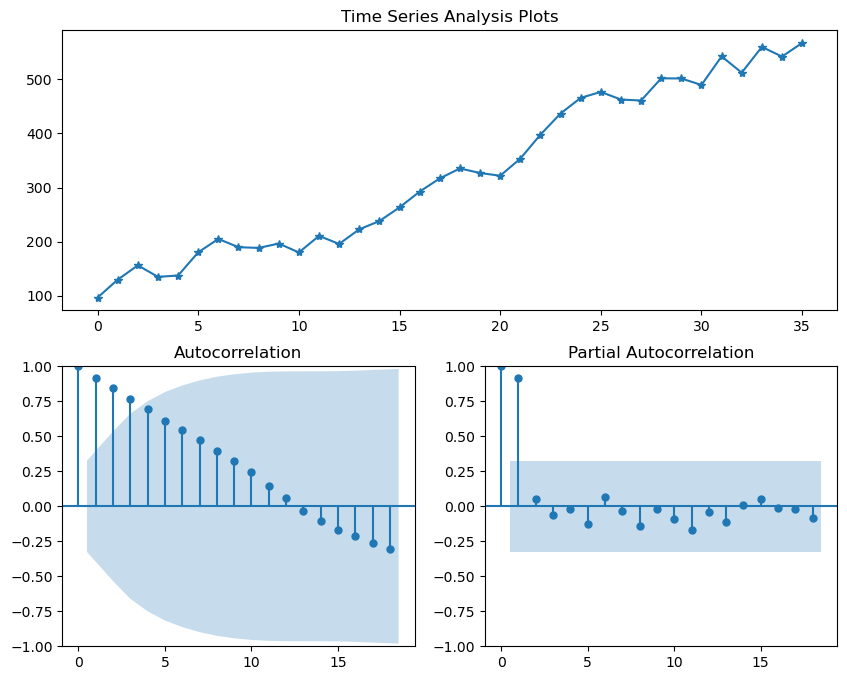

[ 1.          0.91392186  0.84342292  0.76719398  0.69544891  0.6087441
  0.54377943  0.47630634  0.39543399  0.32092332  0.24205714  0.14651776
  0.05781973 -0.03298495 -0.10840121 -0.16824648 -0.21503145 -0.25968956
 -0.30646831 -0.34603944]
0.32666666666666666
[0.32666667 0.32666667 0.53382834 0.66090333 0.74994044 0.81586282
 0.86297154 0.89879252 0.92533595 0.94319618 0.95477734 0.96130355
 0.96368364 0.96405376 0.96417418 0.96547384 0.96859747 0.97367828
 0.98104144 0.99120508]


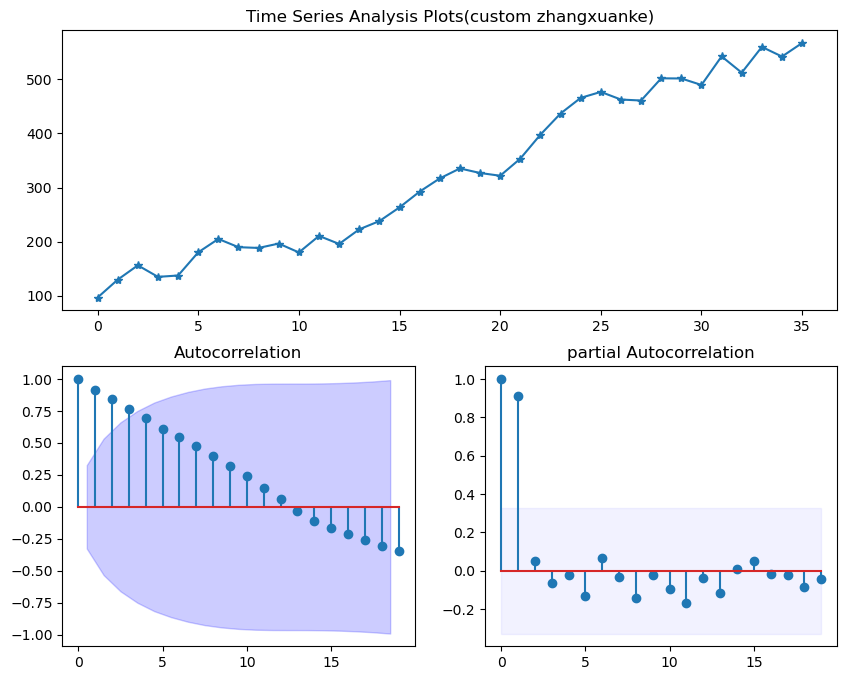

In [107]:
##read data
dfname='附录1.2'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname)
mydrawts(y,dfname)

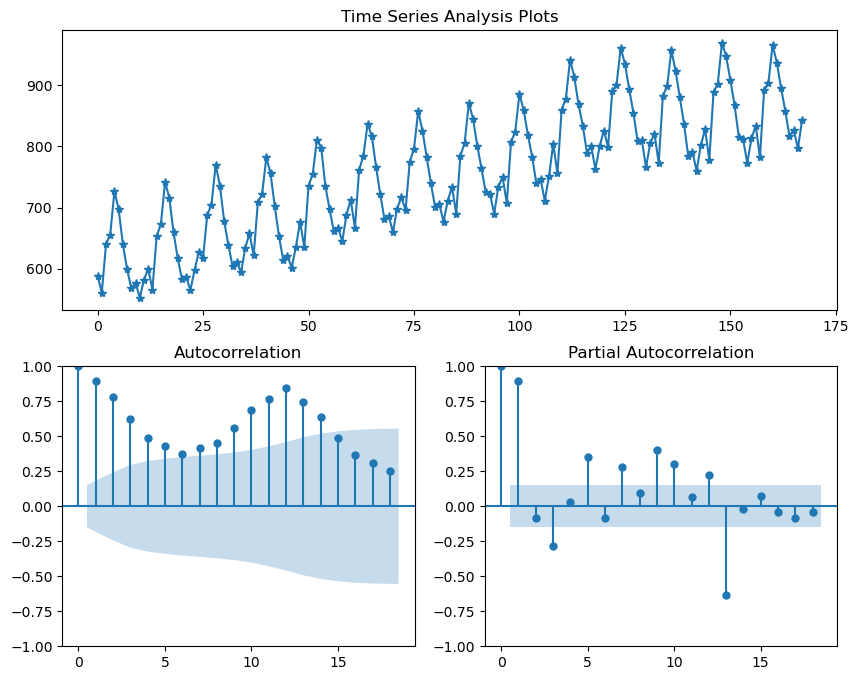

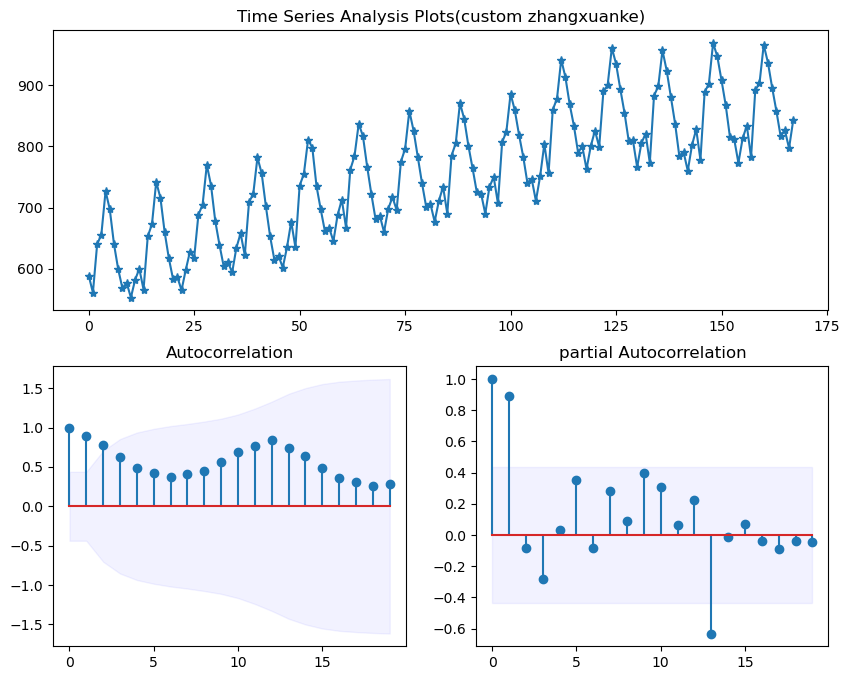

In [34]:
##read data
dfname='附录1.3'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0] 
y=y.values[:,0]
drawts(y,dfname)
mydrawts(y,dfname)

In [ ]:
##read data
dfname='附录1.4'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]
drawts(y,dfname)
mydrawts(y,dfname)